<a href="https://colab.research.google.com/github/drAshcroft/MAT422/blob/main/PimaIndianDiabetis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC,NuSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


In [ ]:
url="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
#Load CSV file using Pandas

pima = pd.read_csv(url)
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


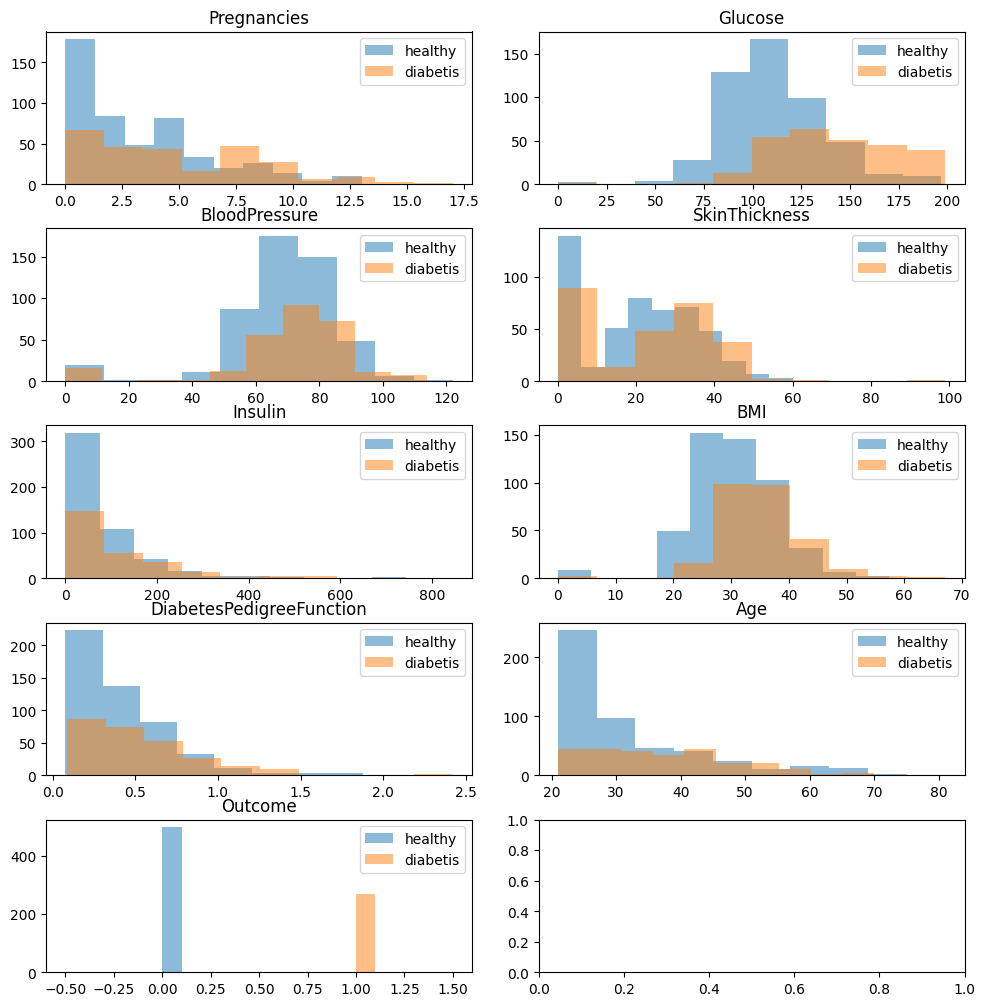

In [ ]:
fig,ax = plt.subplots(5,2, figsize=(10,10))
plt.tight_layout()
ax=ax.flatten()
outcomes = pima['Outcome']
cc=0
for col in pima.columns:
  healthy= pima[col][outcomes==0]
  diabetis= pima[col][outcomes==1]
  ax[cc].hist(healthy, alpha=0.5, label='healthy')
  ax[cc].hist(diabetis, alpha=0.5, label='diabetis')
  ax[cc].legend(loc='upper right')
  ax[cc].set_title(col)
  cc+=1

In [ ]:
pima = pima.loc[pima['Insulin'] != 0]
pima = pima.loc[pima['Glucose'] != 0]
pima = pima.loc[pima['BloodPressure'] != 0]
pima = pima.loc[pima['SkinThickness'] != 0]
pima = pima.loc[pima['BMI'] != 0]
pima = pima.loc[pima['Age'] != 0]
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


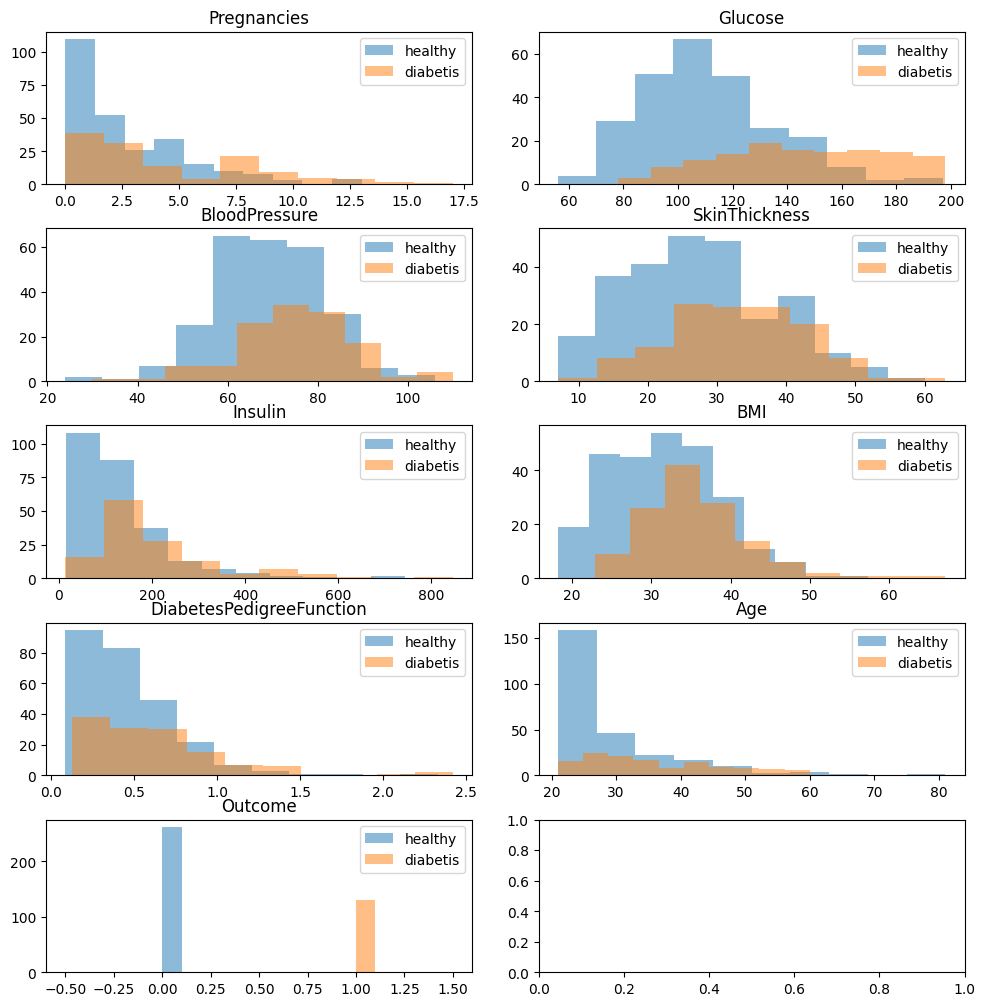

In [ ]:
fig,ax = plt.subplots(5,2, figsize=(10,10))
plt.tight_layout()
ax=ax.flatten()
outcomes = pima['Outcome']
cc=0
for col in pima.columns:
  healthy= pima[col][outcomes==0]
  diabetis= pima[col][outcomes==1]
  ax[cc].hist(healthy, alpha=0.5, label='healthy')
  ax[cc].hist(diabetis, alpha=0.5, label='diabetis')
  ax[cc].legend(loc='upper right')
  ax[cc].set_title(col)
  cc+=1

<Axes: >

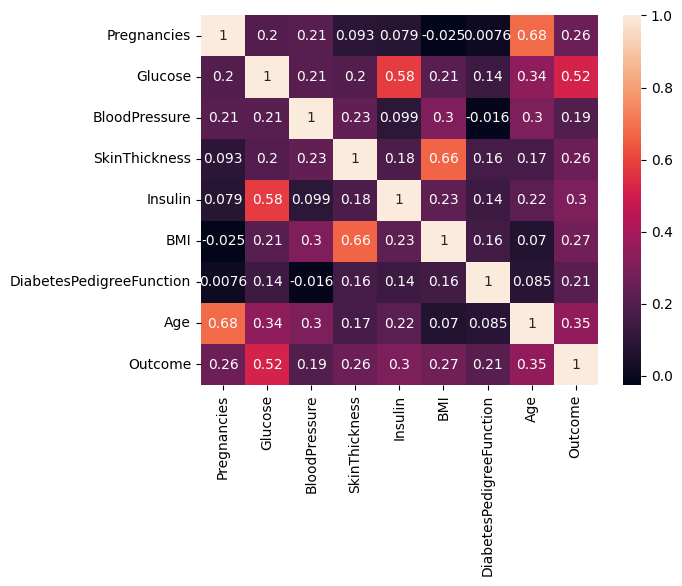

In [ ]:
import seaborn as sns

corr_matrix_pearson = pima.corr(method='pearson')
sns.heatmap(corr_matrix_pearson, annot = True)

In [ ]:
outcomes = pima['Outcome']
features = pima.drop(['Outcome'], axis = 1)

In [ ]:

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = normalize(features_scaled)
features_scaled.shape

(392, 8)

In [ ]:
pca = PCA(n_components = 8)
X_principal = pca.fit_transform(features_scaled)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = [f'P{i}' for i in range(8)]
X_principal.head()

,P0,P1,P2,P3,P4,P5,P6,P7
0,-0.826026,0.047011,-0.107605,-0.307175,-0.143498,-0.023010,0.153303,0.046831
1,0.144910,0.241329,0.304944,0.889947,0.215002,-0.047060,-0.225865,0.012926
2,-0.591050,0.133145,-0.277823,0.224494,-0.606169,-0.080735,0.121927,0.078868
3,0.735115,-0.126441,0.468953,-0.128566,-0.255433,-0.012387,0.231655,0.456760
4,0.524061,-0.265646,0.608112,0.010817,-0.109692,-0.367397,0.283187,0.413282


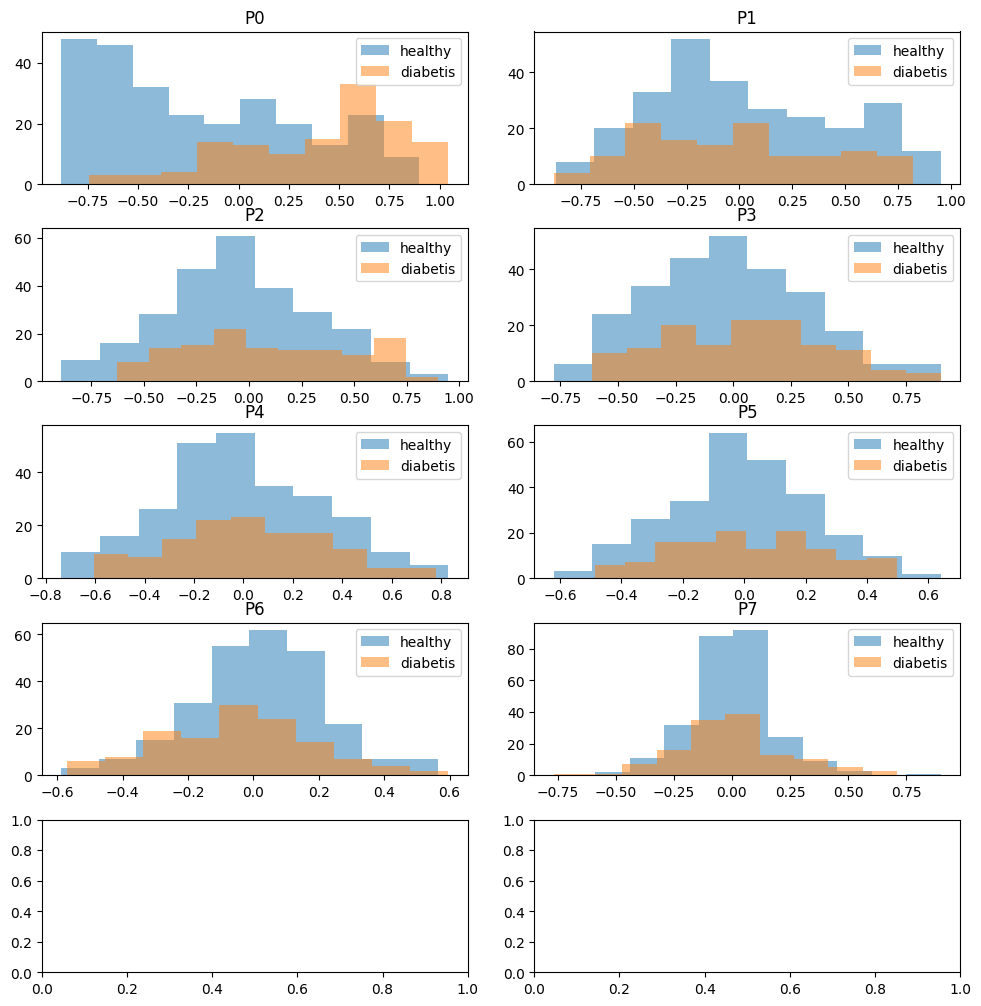

In [ ]:
fig,ax = plt.subplots(5,2, figsize=(10,10))
plt.tight_layout()
ax=ax.flatten()
cc=0
for col in X_principal.columns:
  colData= np.array( X_principal[col])
  healthy  = colData[outcomes==0]
  diabetis = colData[outcomes==1]
  ax[cc].hist(healthy, alpha=0.5, label='healthy')
  ax[cc].hist(diabetis, alpha=0.5, label='diabetis')
  ax[cc].legend(loc='upper right')
  ax[cc].set_title(col)
  cc+=1

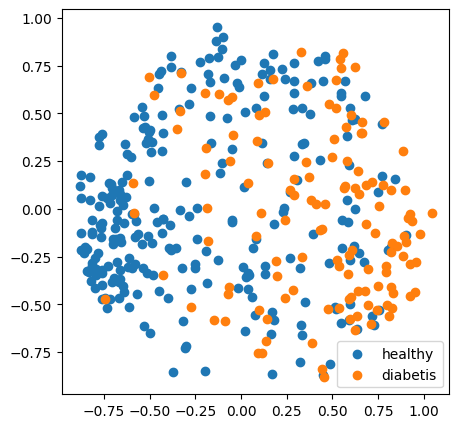

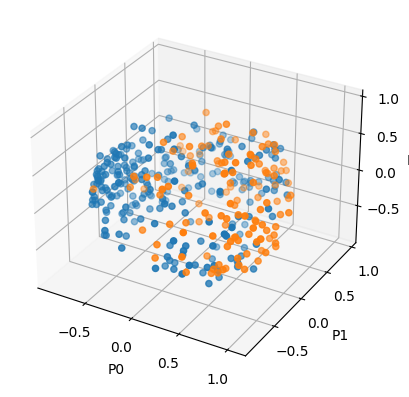

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.tight_layout()
X= np.array( X_principal['P0'])
Y= np.array( X_principal['P1'])
plt.scatter(X[outcomes==0],Y[outcomes==0], label = 'healthy')
plt.scatter(X[outcomes==1],Y[outcomes==1], label = 'diabetis')
plt.legend()
plt.show()

fig = plt.figure()
plt.tight_layout()
ax = fig.add_subplot(projection='3d')

xs= np.array( X_principal['P0'])
ys= np.array( X_principal['P1'])
zs= np.array( X_principal['P2'])

ax.scatter(xs[outcomes==0], ys[outcomes==0], zs[outcomes==0],label = 'healthy')
ax.scatter(xs[outcomes==1], ys[outcomes==1], zs[outcomes==1],label = 'diabetis')

ax.set_xlabel('P0')
ax.set_ylabel('P1')
ax.set_zlabel('P2')

plt.show()

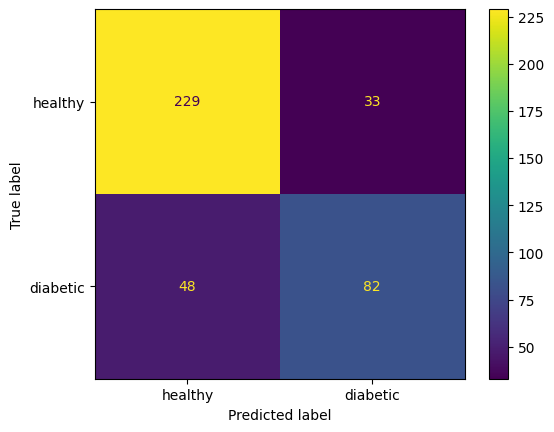

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
svm=SVC(gamma='auto')
svm.fit(X_principal, outcomes)

predicted = svm.predict(X_principal)
cm = confusion_matrix(outcomes, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['healthy', 'diabetic'])
disp.plot()

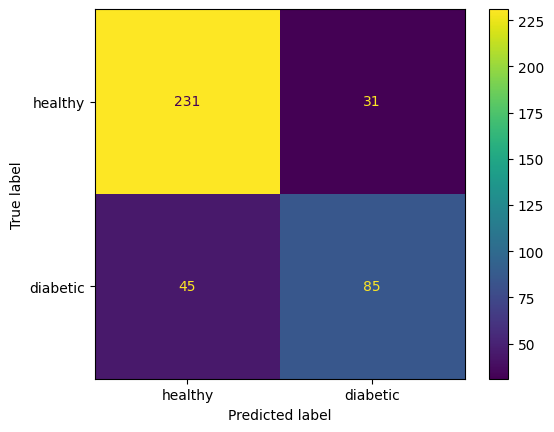

In [ ]:
svm = NuSVC(gamma="auto")
svm.fit(X_principal, outcomes)

predicted = svm.predict(X_principal)
cm = confusion_matrix(outcomes, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['healthy', 'diabetic'])
disp.plot()

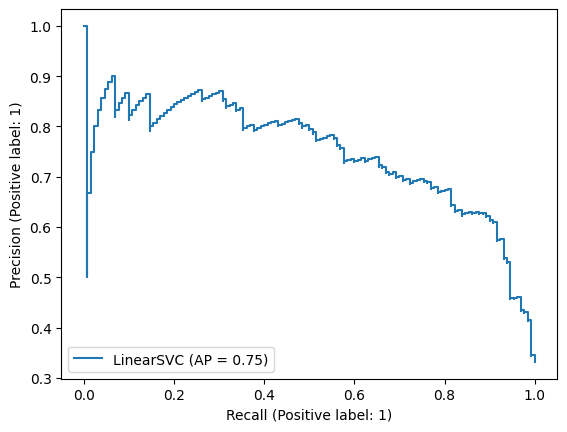

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
y_score = svm.decision_function(X_principal)
PrecisionRecallDisplay.from_predictions(    outcomes, y_score, name="LinearSVC" )


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(outcomes, predicted)

0.8061224489795918